In [1]:
import pandas as pd

#import pandas as pd
file_path = "/Users/filipecarvalho/Documents/data_science_projects/Bone Mineral Density in Older Adults/Exploratory_analyses_BMD_frcarvalho.xlsx"
sheet_name = "UA"
# Read the Excel file and specify boolean data types
df = pd.read_excel(file_path, sheet_name= sheet_name, dtype={
    "Gender": "category",
    'Calsium': bool,
    'Calcitriol': bool,
    'Bisphosphonate': bool,
    'Calcitonin': bool,
    'HTN': bool,
    'COPD': bool,
    'DM': bool,
    'Hyperlipidaemia': bool,
    'Hyperuricemia': bool,
    'AS': bool,
    'VT': bool,
    'VD': bool,
    'OP': bool,
    'CAD': bool,
    'CKD': bool,
    'Fracture': bool,
    'Smoking': bool,
    'Drinking': bool
})


In [2]:
df.shape

(1537, 40)

In [3]:
import pandas as pd
# Create the new column based on the specified conditions
df['OP_TScore'] = False
# Create the 'mask1' mask based on the 'Fracture' column

mask1 = (((df['L1.4T'] <= -2.5) | (df['FNT']<=-2.5) | (df["TLT"]<=-2.5)) | df["Fracture"])

df.loc[mask1, 'OP_TScore'] = True



In [23]:
df.columns
df=df.drop(['FNT', "FN", "TL", "TLT", 'Calsium', 'Calcitriol', 'Bisphosphonate',
       'Calcitonin', "OP"], axis=1)

In [24]:
X_tl=df.drop(["Gender",'L1-4', 'L1.4T', 'OP_TScore'], axis=1)

In [25]:
from joblib import load

# Save the trained model to a file
model_filename = 'random_forest_regressor_model_L1_4.joblib'

# Load the saved model from a file
loaded_model = load(model_filename)

# Make 'TL' predictions on the test set
pred_model_L = loaded_model.predict(X_tl)

# Create a new column 'Predicted_TL' in the DataFrame df to store the predictions
df['Predicted_L1_4'] = pred_model_L


In [26]:
from joblib import load

# Save the trained model to a file
model_filename = 'random_forest_regressor_model_LT.joblib'

# Load the saved model from a file
loaded_model = load(model_filename)

# Make 'TL' predictions on the test set
pred_model_LT = loaded_model.predict(df)
# Assume you already have the 'TL' predictions in y_test_pred_tl (as mentioned in the previous code)

# Create a new column 'Predicted_TL' in the DataFrame df to store the predictions
df['Predicted_LT'] = pred_model_LT

In [27]:
import pandas as pd

# List of variables for which you want to create categories
variables_to_categorize = ["LDL-C", 'Predicted_L1_4', "Predicted_LT", 'ALT',
                           'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg']

# Loop to calculate the 50th percentile and create binary categories for each variable
for var in variables_to_categorize:
    # Calculating the 50th percentile (median)
    median = df[var].median()
    
    # Creating binary categories based on the median
    df[f'{var}_Category'] = pd.cut(df[var], 
                                   bins=[-float('inf'), median, float('inf')], 
                                   labels=[True, False])

In [28]:
import pandas as pd

# List of variables for which you want to create product and ratio variables
variables_to_categorize = ["LDL-C", 'Predicted_L1_4', "Predicted_LT", 'ALT',
                           'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg']

# Loop to calculate products and ratios for each pair of variables
for i, var1 in enumerate(variables_to_categorize):
    for var2 in variables_to_categorize[i+1:]:  # Avoid duplicates and self-combination
        # Creating the product variable
        df[f'{var1}_x_{var2}'] = df[var1] * df[var2]
        
        # Avoiding division by zero when creating the ratio variable
        # Add a small constant to the denominator to avoid division by zero
        df[f'{var1}_to_{var2}'] = df[var1] / (df[var2] + 1e-9)
        df[f'{var2}_to_{var1}'] = df[var2] / (df[var1] + 1e-9)


/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_4060/3239503900.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{var1}_to_{var2}'] = df[var1] / (df[var2] + 1e-9)
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_4060/3239503900.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{var2}_to_{var1}'] = df[var2] / (df[var1] + 1e-9)
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_4060/3239503900.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [29]:
import pandas as pd

variables_to_categorize = ["LDL-C", 'Predicted_L1_4', "Predicted_LT", 'ALT',
                           'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C', 'LDL-C', 'Ca', 'P', 'Mg']

# Dividing the variables into 5 quartiles and creating categorical variables based on these quartiles
for var in variables_to_categorize:
    df[f'{var}_quartile'] = pd.qcut(df[var], 5, labels=False, duplicates='drop') + 1  # +1 to make the labels start from 1

/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_4060/727524091.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{var}_quartile'] = pd.qcut(df[var], 5, labels=False, duplicates='drop') + 1  # +1 para fazer os labels começarem de 1
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_4060/727524091.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{var}_quartile'] = pd.qcut(df[var], 5, labels=False, duplicates='drop') + 1  # +1 para fazer os labels começarem de 1
/var/folders/q3/ycc4hmlj3493q0x11zn3

In [31]:
"""from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
X = df.drop(columns=["L1-4", 'L1.4T', "OP_TScore"])           
X = pd.get_dummies(X)
y = df['OP_TScore']

# Creating an imputer that replaces NaN with the column's median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Create the scaler
scaler = MinMaxScaler()

# Apply normalization to the training and testing data
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_resampled_normalized = scaler.transform(X_test_resampled)

# Defining the feature selection algorithms
feature_selectors = [
    ('RFE', RFE(estimator=RandomForestClassifier())),
    ('SelectKBest_chi2', SelectKBest(score_func=chi2)),
    ('SelectKBest_f_classif', SelectKBest(score_func=f_classif)),
    ('SelectKBest_mutual_info_classif', SelectKBest(score_func=mutual_info_classif)),
    ('SelectFromModel_RF', SelectFromModel(estimator=RandomForestClassifier())),
    ('SelectFromModel_GB', SelectFromModel(estimator=GradientBoostingClassifier())),
    ('SelectFromModel_LR', SelectFromModel(estimator=LogisticRegression())),
  
]

# Defining the classification models
classifiers = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('NaiveBayes', GaussianNB()),
    ('MLP', MLPClassifier()),
    ('XGBoost', XGBClassifier())
]

# Creating pipelines to try different combinations of feature selection algorithms and classification models
for feature_selector_name, feature_selector in feature_selectors:
    for classifier_name, classifier in classifiers:
        pipeline = Pipeline([
            ('feature_selector', feature_selector),
            ('classifier', classifier)
        ])
        pipeline.fit(X_train_resampled_normalized, y_train_resampled)
        predictions = pipeline.predict(X_test_resampled_normalized)
        print(f"Feature Selector: {feature_selector_name}, Classifier: {classifier_name}")
        print(classification_report(y_test_resampled, predictions))
        print(confusion_matrix(y_test_resampled, predictions))
"""


'from sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif, mutual_info_classif\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.neural_network import MLPClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.feature_selection import RFE\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.impute import SimpleImputer\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\nfrom sklearn.preprocessing import MinMaxScaler\nX = df.drop(columns=["L1-4", \'L1.4T\', "OP_TScore"])           \nX = pd.get_dummies

In [32]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
# Loading data and preprocessing
# Assuming "df" is your DataFrame
X = df.drop(columns=["L1-4", "L1.4T", "OP_TScore"])
X = pd.get_dummies(X)
y = df['OP_TScore']

# Creating an imputer that replaces NaN with the column's median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Normalizing the data
scaler = MinMaxScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_resampled_normalized = scaler.transform(X_test_resampled)

# Train RFE once and save the indices of selected features
rfe = SelectFromModel(estimator=GradientBoostingClassifier(n_estimators=55))
rfe.fit(X_train_resampled_normalized, y_train_resampled)
selected_features_indices = np.where(rfe.get_support())[0]

# Use saved indices to select relevant features
X_train_selected = X_train_resampled_normalized[:, selected_features_indices]
X_test_selected = X_test_resampled_normalized[:, selected_features_indices]

# Defining hyperparameters to be tested
param_grid = {
    'n_estimators': [100, 120, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Initializing the classifier
classifier = GradientBoostingClassifier()

# Initializing GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, verbose=3, n_jobs=-1)

# Performing grid search
grid_search.fit(X_train_selected, y_train_resampled)

# Getting the best model after grid search
best_classifier = grid_search.best_estimator_

# Making predictions with the best model
predictions = best_classifier.predict(X_test_selected)

# Displaying results
print("Feature Selector: RFE, Classifier: GradientBoostingClassifier")
print(classification_report(y_test_resampled, predictions))
print(confusion_matrix(y_test_resampled, predictions))

# Performing k-fold cross-validation on the training set only
cv_scores = cross_val_score(best_classifier, Xjoined_array, yjoined_array, cv=5)

# Displaying cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.model_selection import cross_val_score\nimport numpy as np\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import RFE, SelectFromModel\nfrom sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.impute import SimpleImputer\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\nfrom sklearn.preprocessing import MinMaxScaler\nimport numpy as np\nfrom sklearn.feature_selection import SelectKBest, f_classif\nfrom xgboost import XGBClassifier\n# Carregando os dados e pré-processamento\n# Supondo que "df" seja o seu DataFrame\nX = df.drop(columns=["L1-4", "L1.4T", "OP_TScore"])\nX = pd.get_dummies(X)\n

In [33]:
"""best_params = grid_search.best_params_
print("Best Parameters:", best_params)"""

'best_params = grid_search.best_params_\nprint("Best Parameters:", best_params)'

In [34]:
"""# Access and print feature importances
importances = classifier.feature_importances_
feature_names = X.columns[selected_features_indices]  # Get feature names based on selected indices
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance:.4f}")"""


'# Access and print feature importances\nimportances = classifier.feature_importances_\nfeature_names = X.columns[selected_features_indices]  # Get feature names based on selected indices\nfor name, importance in zip(feature_names, importances):\n    print(f"Feature: {name}, Importance: {importance:.4f}")'

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier

# Loading data and preprocessing
X = df.drop(columns=["L1-4", "L1.4T", "OP_TScore"])
X = pd.get_dummies(X)
y = df['OP_TScore']

# Creating an imputer that replaces NaN with the column's median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Normalizing the data
scaler = MinMaxScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_resampled_normalized = scaler.transform(X_test_resampled)

# Train RFE once and save the indices of selected features
rfe = SelectFromModel(estimator=GradientBoostingClassifier(n_estimators=53))
rfe.fit(X_train_resampled_normalized, y_train_resampled)
selected_features_indices = np.where(rfe.get_support())[0]

# Use saved indices to select relevant features
X_train_selected = X_train_resampled_normalized[:, selected_features_indices]
X_test_selected = X_test_resampled_normalized[:, selected_features_indices]

# Train the RandomForestClassifier model with the selected features
classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=130)
classifier.fit(X_train_selected, y_train_resampled)
predictions = classifier.predict(X_test_selected)
probabilities = classifier.predict_proba(X_test_selected)[:, 1]  # Probabilities of the positive class

# Calculate and display the AUC-ROC score
auc_roc = roc_auc_score(y_test_resampled, probabilities)
print("AUC-ROC Score:", auc_roc)

# Displaying the results
print("Feature Selector: RFE, Classifier: GradientBoosting")
print(classification_report(y_test_resampled, predictions))
print(confusion_matrix(y_test_resampled, predictions))

# Performing k-fold cross-validation on the training set only
Xjoined_array = np.concatenate((X_train_selected, X_test_selected), axis=0)
yjoined_array = np.concatenate((y_train_resampled, y_test_resampled), axis=0)
cv_scores = cross_val_score(classifier, Xjoined_array, yjoined_array, cv=5)

# Displaying cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


AUC-ROC Score: 0.925961011687363
Feature Selector: RFE, Classifier: GradientBoosting
              precision    recall  f1-score   support

       False       0.84      0.98      0.90       296
        True       0.98      0.81      0.89       296

    accuracy                           0.90       592
   macro avg       0.91      0.90      0.89       592
weighted avg       0.91      0.90      0.89       592

[[290   6]
 [ 56 240]]
Cross-Validation Scores: [0.7737069  0.95689655 0.97413793 0.92456897 0.93103448]
Mean CV Score: 0.9120689655172415


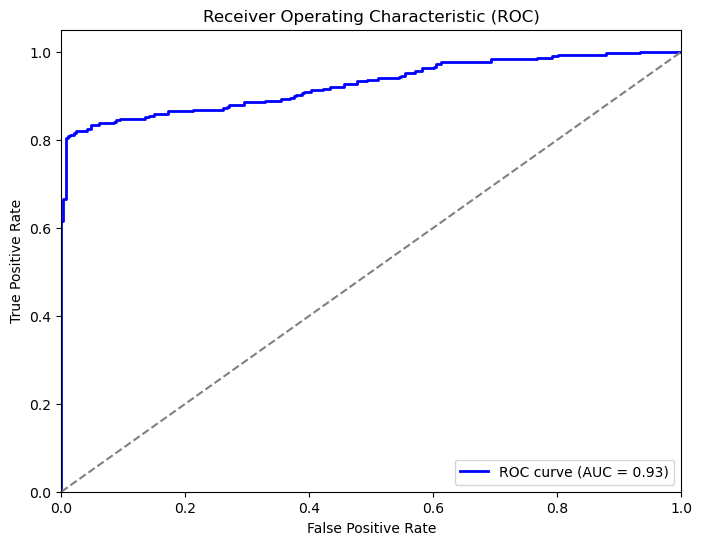

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate prediction probabilities
probabilities = classifier.predict_proba(X_test_selected)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [54]:
# Access and print feature importances
import numpy as np

importances = classifier.feature_importances_
feature_names = X.columns[selected_features_indices]  # Get feature names based on selected indices

# Sort feature importances in descending order
indices_descending = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices_descending]
sorted_importances = importances[indices_descending]

# Print feature importances in descending order
for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"Feature: {name}, Importance: {importance:.4f}")


Feature: Mg, Importance: 0.2114
Feature: CAD, Importance: 0.1487
Feature: Fracture, Importance: 0.0980
Feature: COPD, Importance: 0.0747
Feature: HDL-C_to_ALT, Importance: 0.0504
Feature: AS, Importance: 0.0445
Feature: Mg_quartile, Importance: 0.0428
Feature: BUN_to_URIC, Importance: 0.0415
Feature: AST_to_URIC, Importance: 0.0363
Feature: Predicted_L1_4_x_CREA, Importance: 0.0329
Feature: HTN, Importance: 0.0257
Feature: FBG_to_Predicted_LT, Importance: 0.0200
Feature: Mg_to_Predicted_LT, Importance: 0.0150
Feature: Mg_to_Ca, Importance: 0.0146
Feature: P_Category_True, Importance: 0.0144
Feature: Ca_to_Mg, Importance: 0.0139
Feature: Predicted_LT_x_Ca, Importance: 0.0136
Feature: VD, Importance: 0.0134
Feature: Drinking, Importance: 0.0130
Feature: Predicted_LT_to_Predicted_L1_4, Importance: 0.0129
Feature: Predicted_L1_4_Category_True, Importance: 0.0098
Feature: Ca_Category_False, Importance: 0.0097
Feature: Predicted_LT_to_Mg, Importance: 0.0088
Feature: DM, Importance: 0.0080
Fe

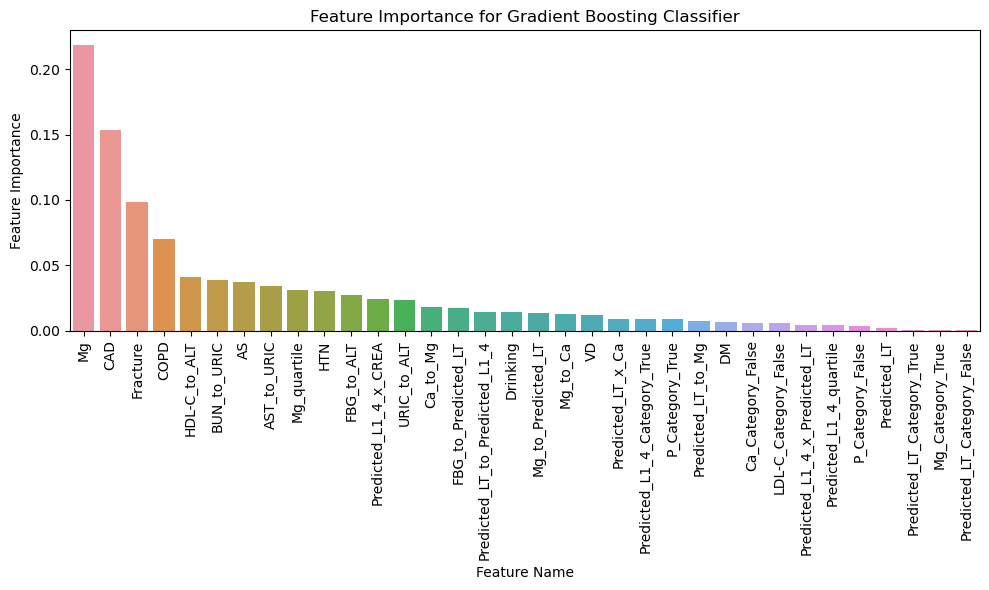

In [38]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features and importances in descending order
sorted_idx = importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features, y=sorted_importances)

# Configure plot elements for better readability
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns


true_negatives, false_positives, false_negatives, true_positives = [291, 5, 57, 239]


plt.figure(figsize=(6, 6))
conf_matrix_data = [[true_negatives, false_positives],
                    [false_negatives, true_positives]]
sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Save the plot as an image

# Plot the cross-validation scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')
plt.xlabel("Fold")
plt.ylabel("CV Score")
plt.title("Cross-Validation Scores")
plt.grid(True)
plt.tight_layout()
plt.savefig("cross_validation_scores.png")  # Save the plot as an image



NameError: name 'labels' is not defined

<Figure size 600x600 with 0 Axes>

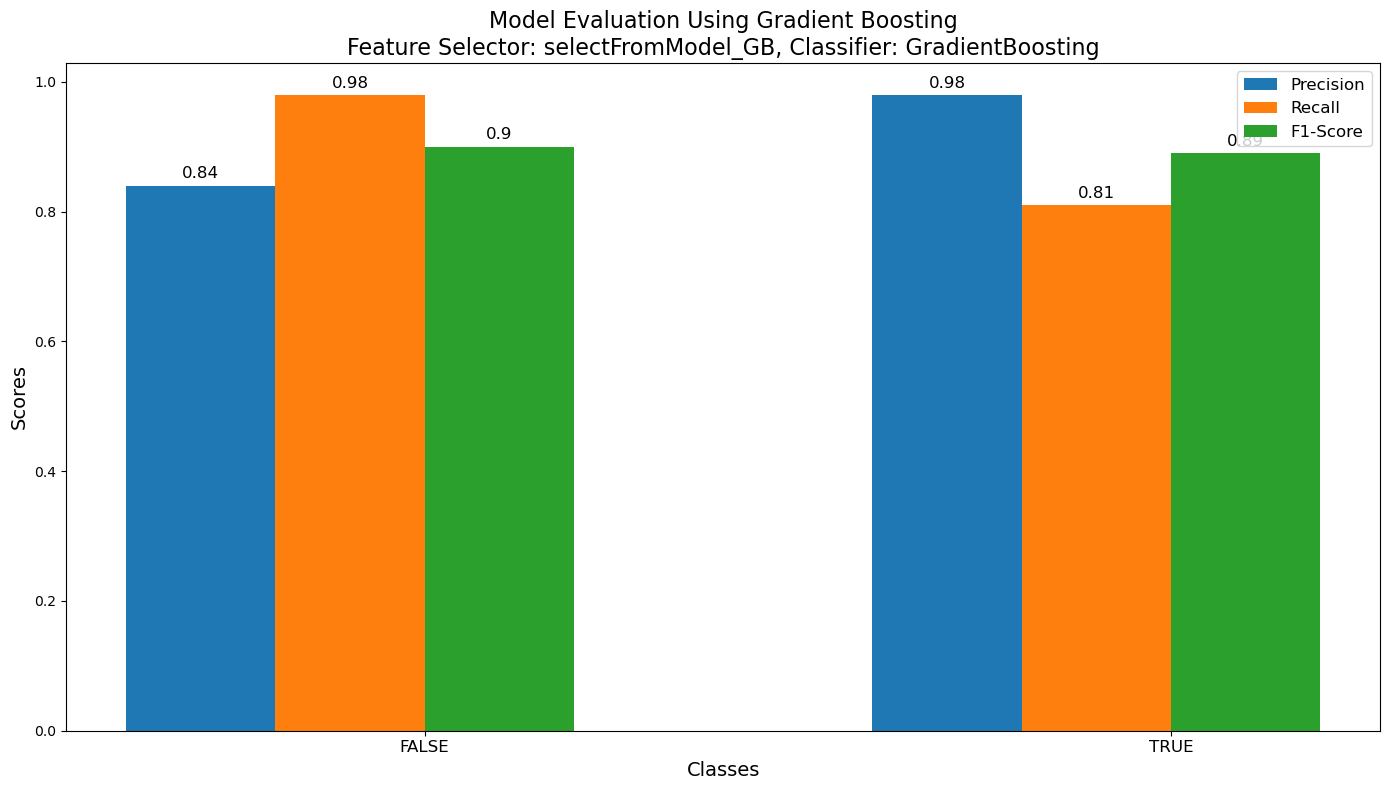

In [ ]:
import matplotlib.pyplot as plt

# Data for metrics
classes = ['FALSE', 'TRUE']
precision = [0.84, 0.98]
recall = [0.98, 0.81]
f1_score = [0.90, 0.89]

# Plot settings
bar_width = 0.2
index = range(len(classes))
fig, ax = plt.subplots(figsize=(14, 8))  # Increased figure size

# Plotting the bars
bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar([p + bar_width for p in index], recall, bar_width, label='Recall')
bar3 = ax.bar([p + 2 * bar_width for p in index], f1_score, bar_width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Classes', fontsize=14)  # Increased font size
ax.set_ylabel('Scores', fontsize=14)  # Increased font size
ax.set_title('Model Evaluation Using Gradient Boosting\nFeature Selector: selectFromModel_GB, Classifier: GradientBoosting', fontsize=16)  # Increased font size
ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_xticklabels(classes, fontsize=12)  # Increased font size
ax.legend(fontsize=12)  # Increased font size

# Add bar values
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)  # Increased font size

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import joblib



# save model with joblib
joblib.dump(classifier, 'model_OP_TScore.pkl')

['model_OP_TScore.pkl']